# Extrasolar Planet Mass vs. Radius for Confirmed Planets

So as to be transparent, I base the following analysis from my lecture notes and examples from the following Udemy courses: 

***Machine Learning in Python Level 1: Beginner*** by Hadelin de Ponteves and Kirill Eremenko

***Machine Learning Classification Bootcamp in Python*** by Dr. Ryan Ahmed, Ph.D., MBA (in progress)

***Python for Data Science and Machine Learning Bootcamp*** by Jose Portilla

as well as chunks of code gleaned from similar studies on Kaggle. Note this data set was aquired outside of these courses. The code here also has been modified from the original sources as it applies to this specific work, as well as to differentiate it from the course content.

Recently discovered ML classification project: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiBsuCvgtf9AhXkEFkFHRjmDmEQFnoECDQQAQ&url=https%3A%2F%2Fpresentations.copernicus.org%2FEPSC2020%2FEPSC2020_833_presentation.pdf&usg=AOvVaw3CBktNuqZdnirrkAg4amGi

The first goal of this analysis will be to recreate the following figure from **The Essential Cosmic Perspective, 7th Edition** Figure 10.13 - and to include all/any new public data available beyond what was used in this publication.

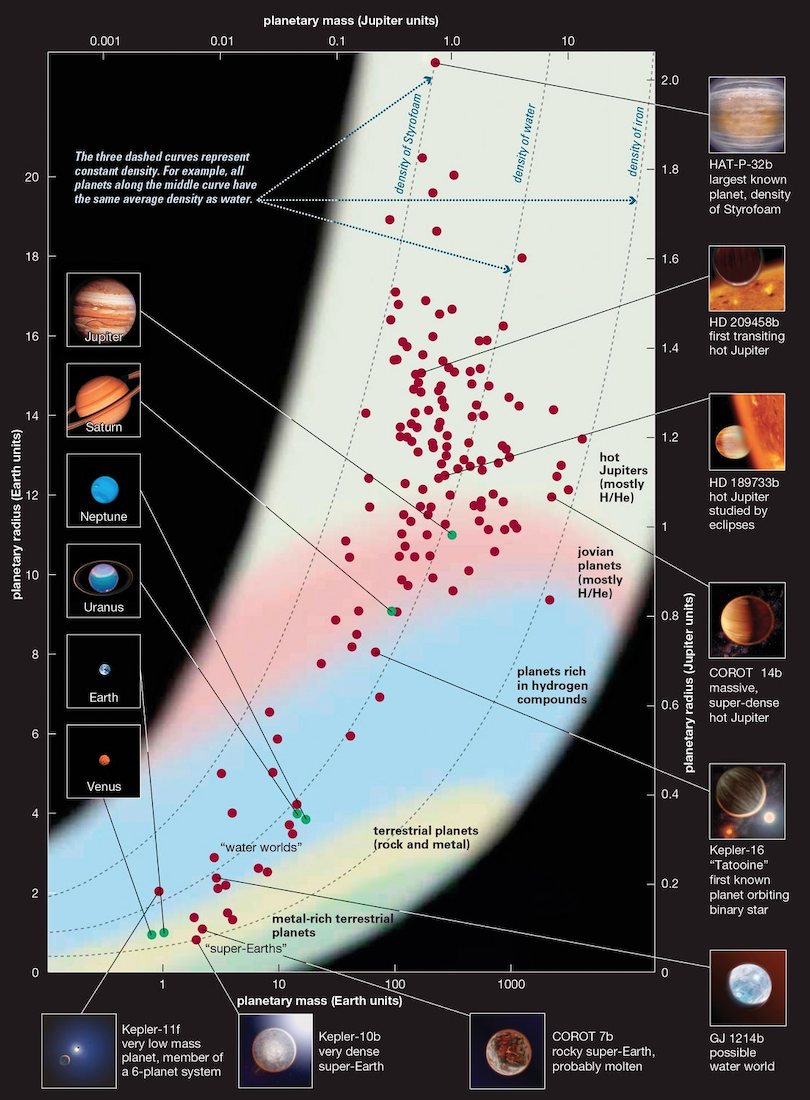

This figure popped into my mind when I thought about K-means Clustering in ***Machine Learning in Python Level 1: Beginner***. In particular, I wanted to see if clusering algorithms could find interesting groups of planets in this graph (updated with recent observations) - and perhaps *if* that clusetering provided any insight into planetary system properties. Moreover cleaning this data set would allow for additional practice of other ML algorithms, as well as would provide a nice sample data set for an experimental methods in astronomy course I am co-teaching (spring 2023). 

First and foremost I want to state that my academic background *is* astrophysics. I did my undergraduate research in observing such planetary systems (using the *transit method*, mentioned next). However my opportunites to study planets in graduate school didn't pan out, and I left that field entirely behind to study galaxies and galaxy evolution, with almost no overlap in content (exception, studying molecular gas). It was only at one of my temparary teaching positions that I was able to help undergradute students do similar research projects and formally revisit this material (as well as that I cover this material in introductory astronomy for non-STEM student courses). It was fun to put this hat on again, if it was only brief in time, but gave me a fun idea to do some analysis.

Thus, I am acutely aware that this project is of little academic value to the field - but if you study this and find this is interesting - send me a message and let's write this up in a journal! This analysis is entirely for practicing my Data Science and Machine Learning skills, blemishes and all, so that people will consider hiring me to do such things with non-astronomy data.

## Crashcourse - Exoplanets:

It comes as a surprise to many that we actually do not directly image planets orbiting other stars all the often. In fact we only have ~60-70 confirmed images of exoplanets (stated on the website this data is sourced from). We detect planets around other stars primary through indirect methods. 

The ***transit method*** looks for eclipses of the planet passinging in front of the parent star. It is important to note here that we still are not directly imaging the planet NOR are we seeing this eclipse in the way we see solar/lunar/Venus/etc. eclipses on Earth. We simply measure the drop in brightness of the parent star. Through physics, we can turn that drop into the **radius of the planet** $R_{\rm planet}$ when we also know information about the star (which is another discussion, but for this study assume that is usually the case for these systems). The frequency with which these transits occur tell us the **period** $P$, and through a relationship called Kepler's 3rd Law, (${\rm Period})^2 \propto ({\rm Semi-Major \  Axis})^3$, we can determine the **semi-major axis** $a$. The semi-major axis is, for nearly circular systems, approximately the average distance between the planet and the star (elliptical systems this relates to the longest half-axis, not important for this analysis).

***Radial velocity*** (or ***RV***) method uses the doppler method (through spectral features (like emission/absortion lines) in the parent star's spectra) to discover planets due to the gravitational *wobble* of a planetary system around the parent star. This method also returns the **period** (and thus semi-major axis) when observed more than once, but this wobble gives the **mass of the planet** $M_{\rm planet}$ - well kind of. This method can not on it's own identify the inclination (parameterized by angle $i$), and thus this method only gives $M_{\rm planet} \sin i$ when $i$ can not be determined.

Thus to make the graph above, we need to isolate *only* systems that have *both* of these independent observations.

## The dataset

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

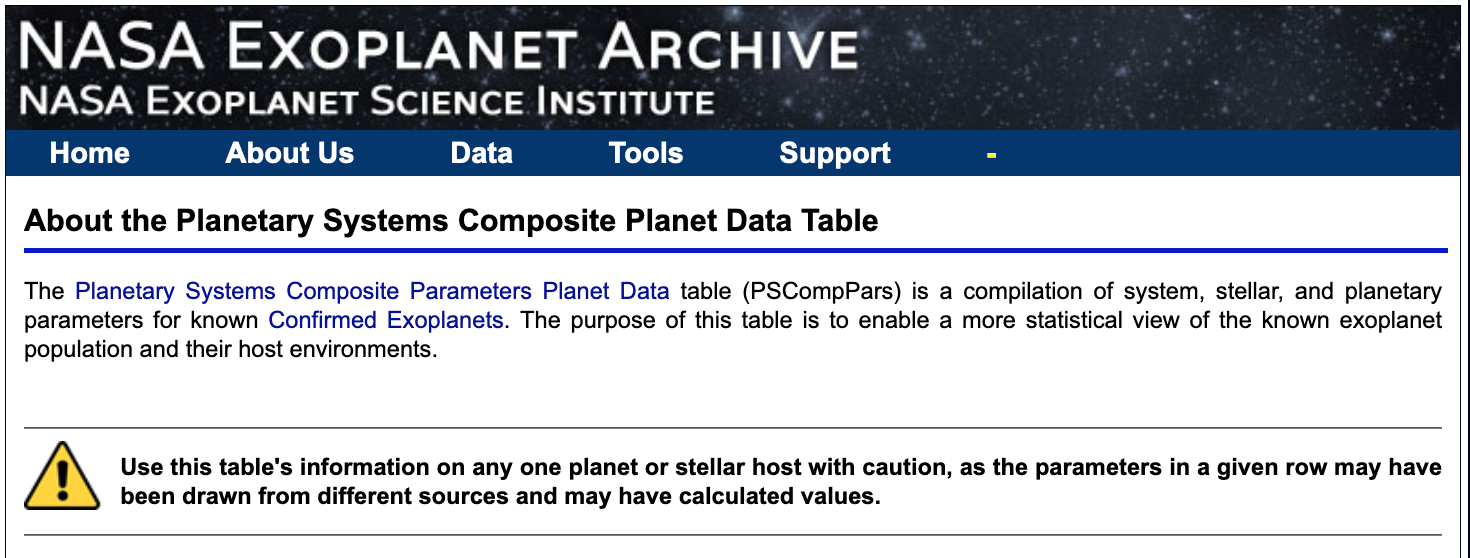

The data we are starting with is an already slimmed down library of observed exoplanets. In the parent data repository, every planet listed in the table could have several entries that measure different sets of parameters in different (perhaps inconsistent) ways. The table we are using is essentially a flat version of this, collapsing all of the data given to one entry per target, but it is removing data that is double entered - regardless of agreement. Thus, there is a lot of build in uncertainty to just using this table. To do a *real* scientific analysis would require a proper collapsing of all of these enteries, justifying why you might pick one study over another for double listed data, etc. - something that is far beyond the scope (or want) of this project.

## Importing the dataset 
#### Based On *Machine Learning in Python Level 1: Beginner*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#### Header from the original csv.

#### This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
#### Sun Feb 26 13:35:18 2023
####
#### User preference: *
####
#### COLUMN pl_name:        Planet Name
#### COLUMN hostname:       Host Name
#### COLUMN sy_snum:        Number of Stars
#### COLUMN sy_pnum:        Number of Planets
#### COLUMN discoverymethod: Discovery Method
#### COLUMN disc_year:      Discovery Year
#### COLUMN disc_facility:  Discovery Facility
#### COLUMN rv_flag:        Detected by Radial Velocity Variations
#### COLUMN tran_flag:      Detected by Transits
#### COLUMN pl_controv_flag: Controversial Flag
#### COLUMN pl_orbper:      Orbital Period [days]
#### COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])
#### COLUMN pl_rade:        Planet Radius [Earth Radius]
#### COLUMN pl_radj:        Planet Radius [Jupiter Radius]
#### COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]
#### COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
#### COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance
#### COLUMN pl_orbeccen:    Eccentricity
#### COLUMN pl_insol:       Insolation Flux [Earth Flux]
#### COLUMN pl_eqt:         Equilibrium Temperature [K]
#### COLUMN ttv_flag:       Data show Transit Timing Variations
#### COLUMN st_spectype:    Spectral Type
#### COLUMN st_teff:        Stellar Effective Temperature [K]
#### COLUMN st_rad:         Stellar Radius [Solar Radius]
#### COLUMN st_mass:        Stellar Mass [Solar mass]
#### COLUMN st_met:         Stellar Metallicity [dex]
#### COLUMN st_metratio:    Stellar Metallicity Ratio
#### COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)]
#### COLUMN rastr:          RA [sexagesimal]
#### COLUMN ra:             RA [deg]
#### COLUMN decstr:         Dec [sexagesimal]
#### COLUMN dec:            Dec [deg]
#### COLUMN sy_dist:        Distance [pc]

In [3]:
df_big = pd.read_csv('PSCompPars_2023.02.26_13.35.18.csv')#, sep=',', on_bad_lines='skip')

As the original figure used $\log_{10} M_{\rm planet}$ and $\log_{10} R_{\rm planet}$, add these to the dataset. Also added density while I was at it. Also added $\log_{10}$ of other things (for analysis later).

In [4]:
df_big['log_pl_bmasse'] = np.log10(df_big['pl_bmasse'].iloc[:].values)
df_big['log_pl_rade'] = np.log10(df_big['pl_rade'].iloc[:].values)
densitye = df_big['pl_bmasse'].iloc[:].values / ((4/3)*(df_big['pl_rade'].iloc[:].values)**3.)
df_big['pl_densitye'] = densitye
df_big['log_pl_densitye'] = np.log10(df_big['pl_densitye'].iloc[:].values)
df_big['log_pl_orbper']= np.log10(df_big['pl_orbper'].iloc[:].values)
df_big['log_pl_orbsmax']= np.log10(df_big['pl_orbsmax'].iloc[:].values)


Create Density Classes https://arxiv.org/abs/1612.03556

The classes in the previous image are not shared in an easily obtainable way. I rather decided to do coarse classifications (at least for now) to identify planets by their densities. This also allows us to remove objects like Brown Dwarf Stars ('failed' stars) that might present themselves here.

Taking their proposed classifications, and stretching the edges since they don't overlap.

Ice/gas giant: $\rho < \approx 2.85$ $\frac{g}{cm^3}$ 

Iron/Rock: $ 2.85 \frac{g}{cm^3} < \approx \rho < \approx 19.2 \frac{g}{cm^3}$

Degenerate (Brown Dwarf): $\rho > \approx 19.2 \frac{g}{cm^3}$ - failed stars  

Note, Brown Dwarves also need a radius ~> 7 times that of Earth - so I will include that classification for Brown Dwarfs, and say otherwise if the densities are higher than $ 2.85 \frac{g}{cm^3} $ they are terrestrial. This is a crude solution.

1 $\frac{M_{Earth}}{R_{Earth}^3}$ = 17.32 $\frac{g}{cm^3}$

In [5]:
df_big['pl_class'] = df_big['pl_name']

pl_densitye = df_big['pl_densitye'].iloc[:].values
pl_class = df_big['pl_name'].iloc[:].values #dummy variables
pl_rade = df_big['pl_rade'].iloc[:].values

den = 17.32

pl_class[(pl_densitye*den <= 2.85)] = 'Jovian'
#pl_class[(pl_densitye*den > 2.85) & (pl_densitye*den <= 19.2)] = 'Terrestrial'
pl_class[(pl_densitye*den > 2.85)] = 'Terrestrial'
pl_class[(pl_densitye*den > 19.2) & (pl_rade > 7)] = 'BrownDwarf'
df_big['pl_class'] = pl_class

In [6]:
#for col in df_big.columns:
#    print(col)

In [7]:
# Grab systems where both transit and RV methods are detected.
#Get Rid of Brown Dwarfs
#also get rid of missing data
#df_detect = df_big[(df_big['rv_flag'] == 1) & (df_big['tran_flag'] == 1)]
df_detect = df_big[(df_big['rv_flag'] == 1) & (df_big['tran_flag'] == 1) & (df_big['pl_densitye'] <= 19.2/den)]

df_detect = df_detect.dropna(subset=['log_pl_bmasse', 'log_pl_rade','log_pl_densitye','log_pl_orbper','pl_orbeccen','st_teff', 'st_mass','pl_class'])

In [8]:
df = df_detect[['log_pl_bmasse','log_pl_rade','log_pl_densitye','log_pl_orbper', 'st_teff', 'st_mass', 'pl_class']]

### Explore Data - My Work 

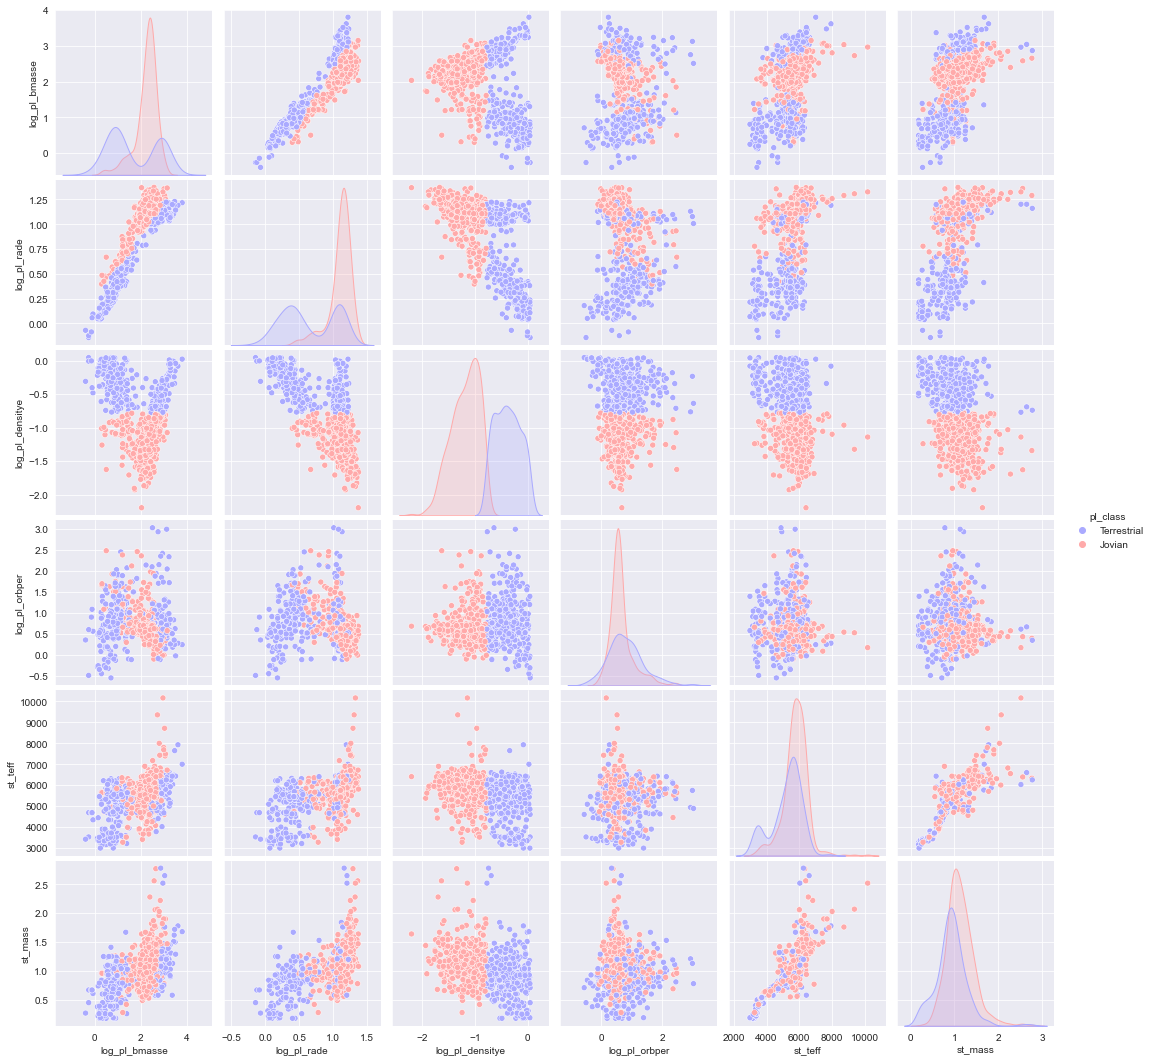

In [9]:
sns.pairplot(df,palette='bwr', hue='pl_class')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 30 to 5256
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_pl_bmasse    769 non-null    float64
 1   log_pl_rade      769 non-null    float64
 2   log_pl_densitye  769 non-null    float64
 3   log_pl_orbper    769 non-null    float64
 4   st_teff          769 non-null    float64
 5   st_mass          769 non-null    float64
 6   pl_class         769 non-null    object 
dtypes: float64(6), object(1)
memory usage: 48.1+ KB


# K-means Clustering 

Methods from:

***Machine Learning in Python Level 1: Beginner*** by Hadelin de Ponteves and Kirill Eremenko

***Python for Data Science and Machine Learning Bootcamp*** by Jose Portilla

## Using the elbow method to find the optimal number of clusters 
### Based On *Machine Learning in Python Level 1: Beginner*

In [11]:
df = df_detect[['log_pl_bmasse','log_pl_rade','log_pl_densitye','log_pl_orbper', 'st_teff', 'st_mass']]#, 'pl_class']]
#df = df_detect[['log_pl_bmasse','log_pl_rade']]

In [12]:
X = df.iloc[:,:].values

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
  #kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42) #k-means++ avoids 
  kmeans = KMeans(n_clusters = i, init = "random", random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#k-means++ does a weighted selection of centroids to avoid an inital centroid choice bias

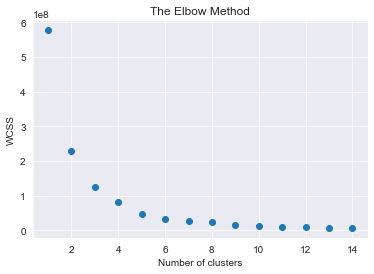

In [14]:
plt.scatter(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset 
#### Based On *Machine Learning in Python Level 1: Beginner*

It's hard to say where the elbow is, but I would guess $n$=5 is best.

In [15]:
#kmeans = KMeans(n_clusters = 5, init='random', random_state=42)
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X) #fit_predict will return a vector for each data point which cluster it belongs to

### Evaluate Clustering - My Work Beyond Course Content

In [16]:
#Add Cluster Info To The DataFrame
df['Cluster_k=5']=y_pred

/var/folders/ny/3twd2wjn4_lcsddswcby5gdc0000gn/T/ipykernel_17924/827737723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_k=5']=y_pred


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster_k=5'],kmeans.labels_))
print(classification_report(df['Cluster_k=5'],kmeans.labels_))

[[313   0   0   0   0]
 [  0 135   0   0   0]
 [  0   0 241   0   0]
 [  0   0   0  69   0]
 [  0   0   0   0  11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       241
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        11

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769



## Visualising the clusters
### Based On *Machine Learning in Python Level 1: Beginner*

### Seaborn Visualizations - My Work Beyond Course Content

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


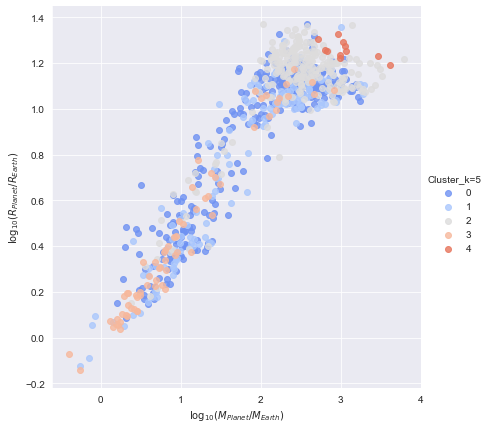

In [18]:
sns.set_style('darkgrid')
ax = sns.lmplot(x = 'log_pl_bmasse',y = 'log_pl_rade',data=df, hue='Cluster_k=5',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
ax.set(xlabel='$\log_{10} (M_{Planet} / M_{Earth})$', ylabel='$\log_{10} (R_{Planet} / R_{Earth})$')

In [19]:
# Let's add clustering info to the bigger dataset and check some other visualizations.
df_detect['Cluster_k=5']=y_pred

# SNS pairplot with cluster highlight

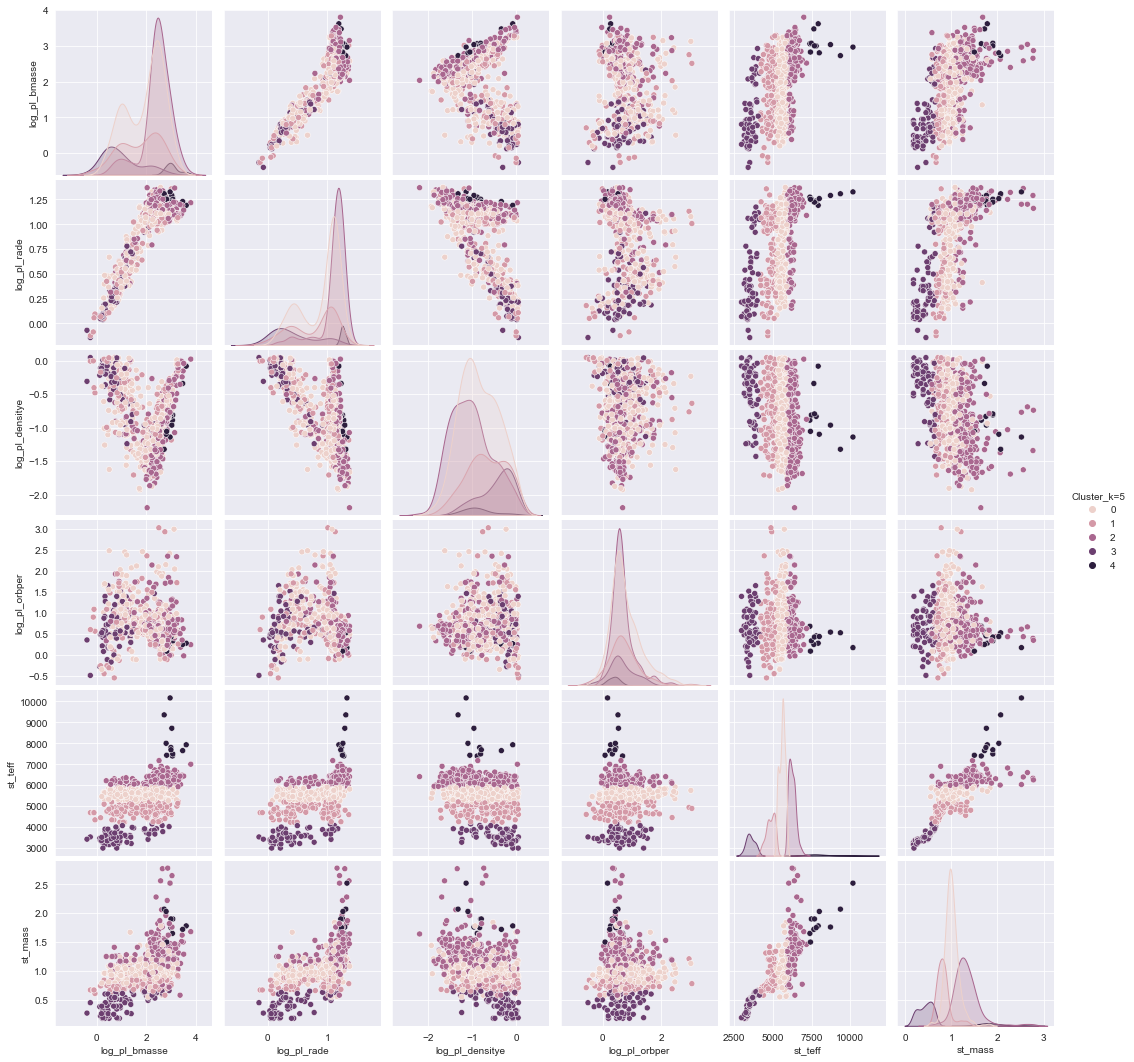

In [20]:
sns.color_palette("hls", 8)
sns.pairplot(df, hue='Cluster_k=5')#, palette='rocket')